In [1]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image


class MTDataset(Dataset):
    def __init__(self, d, t=None):
        self.s = []  
        for i, c in enumerate(['makeup', 'non-makeup']):
            p = os.path.join(d, c)
            if os.path.exists(p):
                for f in os.listdir(p):
                    if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                        self.s.append((os.path.join(p, f), i))
        self.t = t
    
   
    

    def __len__(self):
        return len(self.s)

    def __getitem__(self, i):
        img, lbl = Image.open(self.s[i][0]).convert('RGB'), self.s[i][1]
        return self.t(img) if self.t else img, lbl


tf = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# 主程序
if __name__ == "__main__":
    ds = MTDataset("MT-Dataset/images", tf)
    if ds.s:
        dl = DataLoader(ds, 32, shuffle=True, num_workers=0)
        for imgs, lbls in dl:
            print(f"图片形状：{imgs.shape}，标签：{lbls[:5]}")
            break
    else:
        print("无有效样本")

图片形状：torch.Size([32, 3, 224, 224])，标签：tensor([0, 1, 1, 0, 1])


/Users/limengyan/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "



开始训练（共2455训练样本，613验证样本，766测试样本）
早停配置：目标准确率90.0%，耐心值3轮

Epoch 1/25
--------------------------------------------------


验证中: 100%|███████████████████████████████████| 20/20 [00:19<00:00,  1.01it/s]


保存最佳模型，验证准确率：84.18%
❌ 验证集准确率未达标（84.18% < 90.0%），耐心计数重置为0
训练损失：0.4874 | 训练准确率：76.09%
验证损失：0.3517 | 验证准确率：84.18%

Epoch 2/25
--------------------------------------------------


验证中: 100%|███████████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


保存最佳模型，验证准确率：85.32%
❌ 验证集准确率未达标（85.32% < 90.0%），耐心计数重置为0
训练损失：0.3230 | 训练准确率：86.52%
验证损失：0.3056 | 验证准确率：85.32%

Epoch 3/25
--------------------------------------------------


验证中: 100%|███████████████████████████████████| 20/20 [00:20<00:00,  1.01s/it]


保存最佳模型，验证准确率：87.93%
❌ 验证集准确率未达标（87.93% < 90.0%），耐心计数重置为0
训练损失：0.3048 | 训练准确率：87.37%
验证损失：0.2775 | 验证准确率：87.93%

Epoch 4/25
--------------------------------------------------


验证中: 100%|███████████████████████████████████| 20/20 [00:20<00:00,  1.01s/it]


保存最佳模型，验证准确率：88.91%
❌ 验证集准确率未达标（88.91% < 90.0%），耐心计数重置为0
训练损失：0.2768 | 训练准确率：88.19%
验证损失：0.2652 | 验证准确率：88.91%

Epoch 5/25
--------------------------------------------------


验证中: 100%|███████████████████████████████████| 20/20 [00:21<00:00,  1.08s/it]


保存最佳模型，验证准确率：89.40%
❌ 验证集准确率未达标（89.40% < 90.0%），耐心计数重置为0
训练损失：0.2627 | 训练准确率：89.21%
验证损失：0.2532 | 验证准确率：89.40%

Epoch 6/25
--------------------------------------------------


验证中: 100%|███████████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


❌ 验证集准确率未达标（89.40% < 90.0%），耐心计数重置为0
训练损失：0.2582 | 训练准确率：88.80%
验证损失：0.2828 | 验证准确率：86.95%

Epoch 7/25
--------------------------------------------------


验证中: 100%|███████████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


保存最佳模型，验证准确率：90.21%
✅ 验证集准确率达标（90.21% ≥ 90.0%），耐心计数：1/3
训练损失：0.2486 | 训练准确率：89.25%
验证损失：0.2509 | 验证准确率：90.21%

Epoch 8/25
--------------------------------------------------


验证中: 100%|███████████████████████████████████| 20/20 [00:20<00:00,  1.02s/it]


✅ 验证集准确率达标（90.21% ≥ 90.0%），耐心计数：2/3
训练损失：0.2431 | 训练准确率：89.53%
验证损失：0.3391 | 验证准确率：84.67%

Epoch 9/25
--------------------------------------------------


验证中: 100%|███████████████████████████████████| 20/20 [00:21<00:00,  1.06s/it]


保存最佳模型，验证准确率：90.54%
✅ 验证集准确率达标（90.54% ≥ 90.0%），耐心计数：3/3

🎉 连续3轮验证集准确率≥90.0%，触发早停，停止训练！
训练损失：0.2492 | 训练准确率：89.16%
验证损失：0.2365 | 验证准确率：90.54%

开始测试最佳模型...


验证中: 100%|███████████████████████████████████| 24/24 [00:25<00:00,  1.07s/it]
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1682/2775610601.py:256: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1682/2775610601.py:256: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1682/2775610601.py:256: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1682/2775610601.py:256: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  plt.tight_layout()
/var/folders/mf/hq3v06dx7sdgx_rh48zsrm5m0000gn/T/ipykernel_1682/2775610601.py:256: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from current font


最终测试集准确率：90.60%


/Users/limengyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/limengyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/limengyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/limengyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/limengyan/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8

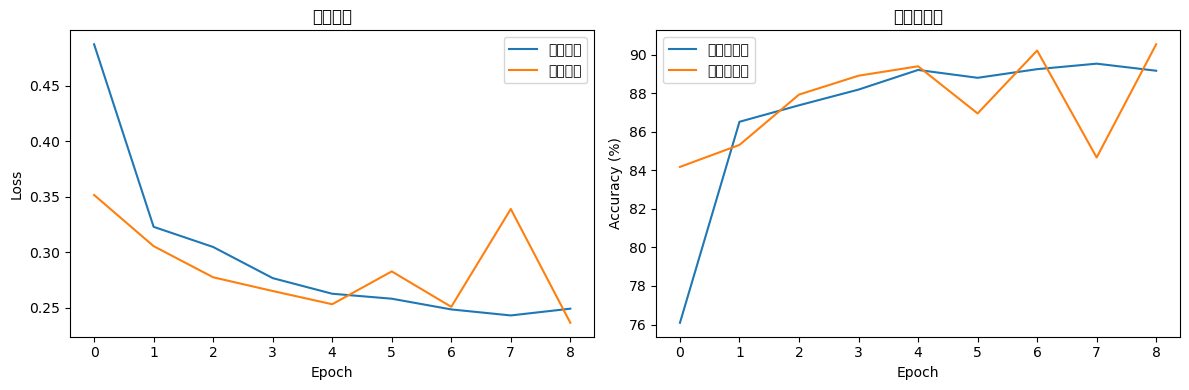


✅ 测试集准确率 90.60% ≥ 90%，满足要求！


In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models
from torchvision.models import ResNet18_Weights
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

# 自定义数据集类
class MTDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.sample_list = []  # 存储(图片路径, 标签)
        self.classes = ['makeup', 'non-makeup']  # 类别列表，makeup=0, non-makeup=1
        self.transform = transform

        # 遍历每个类别文件夹
        for label, cls_name in enumerate(self.classes):
            cls_dir = os.path.join(root_dir, cls_name)
            if not os.path.exists(cls_dir):
                print(f"警告：类别文件夹 {cls_dir} 不存在")
                continue
            
            # 遍历文件夹内的图片文件
            for file_name in os.listdir(cls_dir):
                if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
                    img_path = os.path.join(cls_dir, file_name)
                    self.sample_list.append((img_path, label))

    def __len__(self):
        return len(self.sample_list)

    def __getitem__(self, idx):
        # 加载图片并转换为RGB
        img_path, label = self.sample_list[idx]
        image = Image.open(img_path).convert('RGB')
        
        # 应用数据变换
        if self.transform:
            image = self.transform(image)
        
        return image, label

# 数据预处理（训练集增加数据增强）
def get_transforms():
    # 训练集变换（含数据增强）
    train_transform = transforms.Compose([
        transforms.RandomResizedCrop(224),  # 随机裁剪
        transforms.RandomHorizontalFlip(),  # 随机水平翻转
        transforms.RandomRotation(10),      # 随机旋转
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # 验证/测试集变换（仅标准化）
    val_test_transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    return train_transform, val_test_transform

# 训练和验证函数
def train_one_epoch(model, dataloader, criterion, optimizer, device):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(dataloader, desc="训练中"):
        images, labels = images.to(device), labels.to(device)
        
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 反向传播与优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 统计指标
        total_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    avg_loss = total_loss / total
    accuracy = 100 * correct / total
    return avg_loss, accuracy

def validate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="验证中"):
            images, labels = images.to(device), labels.to(device)
            
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            total_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = total_loss / total
    accuracy = 100 * correct / total
    return avg_loss, accuracy

# 主程序
if __name__ == "__main__":
    # 1. 配置参数
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    DATA_ROOT = "MT-Dataset/images"  # 你的数据集根目录
    BATCH_SIZE = 32
    EPOCHS = 25  # 最大训练轮次
    LEARNING_RATE = 0.001
    VALIDATION_SPLIT = 0.2  # 训练集中拆分20%作为验证集
    
    # 早停相关参数
    TARGET_ACC = 90.0  # 目标准确率（≥90%）
    PATIENCE = 3        # 连续3轮验证集准确率达标才停止
    patience_counter = 0# 耐心值计数器
    early_stop = False  # 早停标志

    # 2. 数据加载与划分
    train_transform, val_test_transform = get_transforms()
    
    # 加载完整数据集
    full_dataset = MTDataset(DATA_ROOT, transform=None)
    if len(full_dataset) == 0:
        print("错误：未找到任何有效样本，请检查数据集路径！")
        exit()
    
    # 划分训练集和测试集（8:2）
    test_size = int(0.2 * len(full_dataset))
    train_val_size = len(full_dataset) - test_size
    train_val_dataset, test_dataset = random_split(full_dataset, [train_val_size, test_size])
    
    # 为训练/验证/测试集绑定不同的变换
    train_val_dataset.dataset.transform = train_transform
    test_dataset.dataset.transform = val_test_transform
    
    # 从训练集中拆分验证集
    val_size = int(VALIDATION_SPLIT * train_val_size)
    train_size = train_val_size - val_size
    train_dataset, val_dataset = random_split(train_val_dataset, [train_size, val_size])
    
    # 创建DataLoader
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
    
    # 3. 加载并改造ResNet18
    model = models.resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
    
    # 冻结主干网络权重
    for param in model.parameters():
        param.requires_grad = False
    
    # 替换最后一层全连接层（二分类）
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)
    model = model.to(DEVICE)
    
    # 4. 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    # 仅优化最后一层的参数
    optimizer = optim.SGD(model.fc.parameters(), lr=LEARNING_RATE, momentum=0.9, weight_decay=1e-4)
    # 学习率调度器（验证损失不下降时降低学习率）
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=4, factor=0.1, verbose=True)
    
    # 5. 训练过程（带早停）
    best_val_acc = 0.0
    train_losses, train_accs = [], []
    val_losses, val_accs = [], []
    
    print(f"\n开始训练（共{len(train_dataset)}训练样本，{len(val_dataset)}验证样本，{len(test_dataset)}测试样本）")
    print(f"早停配置：目标准确率{TARGET_ACC}%，耐心值{PATIENCE}轮")
    
    for epoch in range(EPOCHS):
        # 如果触发早停，跳出循环
        if early_stop:
            break
        
        print(f"\nEpoch {epoch+1}/{EPOCHS}")
        print("-" * 50)
        
        # 训练
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, DEVICE)
        # 验证
        val_loss, val_acc = validate(model, val_loader, criterion, DEVICE)
        
        # 保存训练记录
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        # 更新学习率
        scheduler.step(val_loss)
        
        # 保存最佳模型
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            torch.save(model.state_dict(), "best_makeup_model.pth")
            print(f"保存最佳模型，验证准确率：{best_val_acc:.2f}%")
        
        # 早停逻辑判断
        if best_val_acc >= TARGET_ACC:
            patience_counter += 1
            print(f"✅ 验证集准确率达标（{best_val_acc:.2f}% ≥ {TARGET_ACC}%），耐心计数：{patience_counter}/{PATIENCE}")
            # 连续达标轮次达到耐心值，触发早停
            if patience_counter >= PATIENCE:
                print(f"\n🎉 连续{PATIENCE}轮验证集准确率≥{TARGET_ACC}%，触发早停，停止训练！")
                early_stop = True
        else:
            # 未达标则重置计数器
            patience_counter = 0
            print(f"❌ 验证集准确率未达标（{best_val_acc:.2f}% < {TARGET_ACC}%），耐心计数重置为0")
        
        print(f"训练损失：{train_loss:.4f} | 训练准确率：{train_acc:.2f}%")
        print(f"验证损失：{val_loss:.4f} | 验证准确率：{val_acc:.2f}%")
    
    # 6. 测试最佳模型
    print("\n开始测试最佳模型...")
    model.load_state_dict(torch.load("best_makeup_model.pth"))
    test_loss, test_acc = validate(model, test_loader, criterion, DEVICE)
    print(f"\n最终测试集准确率：{test_acc:.2f}%")
    
    # 7. 绘制训练曲线
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="训练损失")
    plt.plot(val_losses, label="验证损失")
    plt.title("损失曲线")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label="训练准确率")
    plt.plot(val_accs, label="验证准确率")
    plt.title("准确率曲线")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.legend()
    
    plt.tight_layout()
    plt.savefig("training_curves.png")
    plt.show()
    
    # 检查测试集是否达标
    if test_acc >= 90:
        print(f"\n✅ 测试集准确率 {test_acc:.2f}% ≥ 90%，满足要求！")
    else:
        print(f"\n❌ 测试集准确率 {test_acc:.2f}% < 90%，建议：")
        print("1. 增加训练轮数（如EPOCHS=30）")
        print("2. 解冻ResNet18的layer4层进行微调")
        print("3. 调整学习率（如LR=0.005）")
        print("4. 增加更多数据增强手段（如随机亮度/对比度）")